In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
NO2_E04=pd.read_csv("NO2_E04.csv", index_col = "DATETIME")
NO2_E42=pd.read_csv("NO2_E42.csv", index_col = "DATETIME")
NO2_E43=pd.read_csv("NO2_E43.csv", index_col = "DATETIME")
NO2_E44=pd.read_csv("NO2_E44.csv", index_col = "DATETIME")
NO2_E50=pd.read_csv("NO2_E50.csv", index_col = "DATETIME")
NO2_E54=pd.read_csv("NO2_E54.csv", index_col = "DATETIME")
NO2_E57=pd.read_csv("NO2_E57.csv", index_col = "DATETIME")

In [3]:
NO2 = NO2_E04
NO2["mg/m^3_42"]=NO2_E42["mg/m^3_42"]
NO2["mg/m^3_43"]=NO2_E43["mg/m^3_43"]
NO2["mg/m^3_44"]=NO2_E44["mg/m^3_44"]
NO2["mg/m^3_50"]=NO2_E50["mg/m^3_50"]
NO2["mg/m^3_54"]=NO2_E54["mg/m^3_54"]
NO2["mg/m^3_57"]=NO2_E57["mg/m^3_57"]

NO2

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
DATETIME,,,,,,,
2021-01-01 01:00:00,37.0,31.0,36.0,33.0,27.0,29.0,18.0
2021-01-01 02:00:00,33.0,46.0,35.0,24.0,27.0,25.0,30.0
2021-01-01 03:00:00,24.0,18.0,33.0,14.0,12.0,12.0,4.0
2021-01-01 04:00:00,23.0,12.0,13.0,20.0,10.0,11.0,5.0
2021-01-01 05:00:00,35.0,12.0,12.0,19.0,15.0,15.0,7.0
...,...,...,...,...,...,...,...
2021-12-31 20:00:00,45.0,53.0,58.0,48.0,32.0,50.0,45.0
2021-12-31 21:00:00,42.0,51.0,63.0,44.0,32.0,44.0,45.0
2021-12-31 22:00:00,42.0,53.0,50.0,41.0,33.0,44.0,44.0


In [4]:
NO2.describe()

,mg/m^3_04,mg/m^3_42,mg/m^3_43,mg/m^3_44,mg/m^3_50,mg/m^3_54,mg/m^3_57
count,8417.000000,8371.000000,8417.000000,8351.000000,8409.000000,8444.000000,8342.000000
mean,25.718189,21.817943,37.529999,31.450844,24.773814,20.354098,18.292616
std,16.210414,15.844754,19.276859,17.754559,18.001347,15.295933,14.471279
min,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,1.000000
25%,13.000000,11.000000,23.000000,18.000000,11.000000,10.000000,8.000000
50%,22.000000,17.000000,34.000000,28.000000,20.000000,15.000000,14.000000
75%,36.000000,28.000000,49.000000,41.000000,35.000000,26.000000,23.000000
max,90.000000,114.000000,128.000000,127.000000,123.000000,103.000000,98.000000


In [5]:
NO2.count()/8736

mg/m^3_04    0.963484
mg/m^3_42    0.958219
mg/m^3_43    0.963484
mg/m^3_44    0.955929
mg/m^3_50    0.962569
mg/m^3_54    0.966575
mg/m^3_57    0.954899
dtype: float64

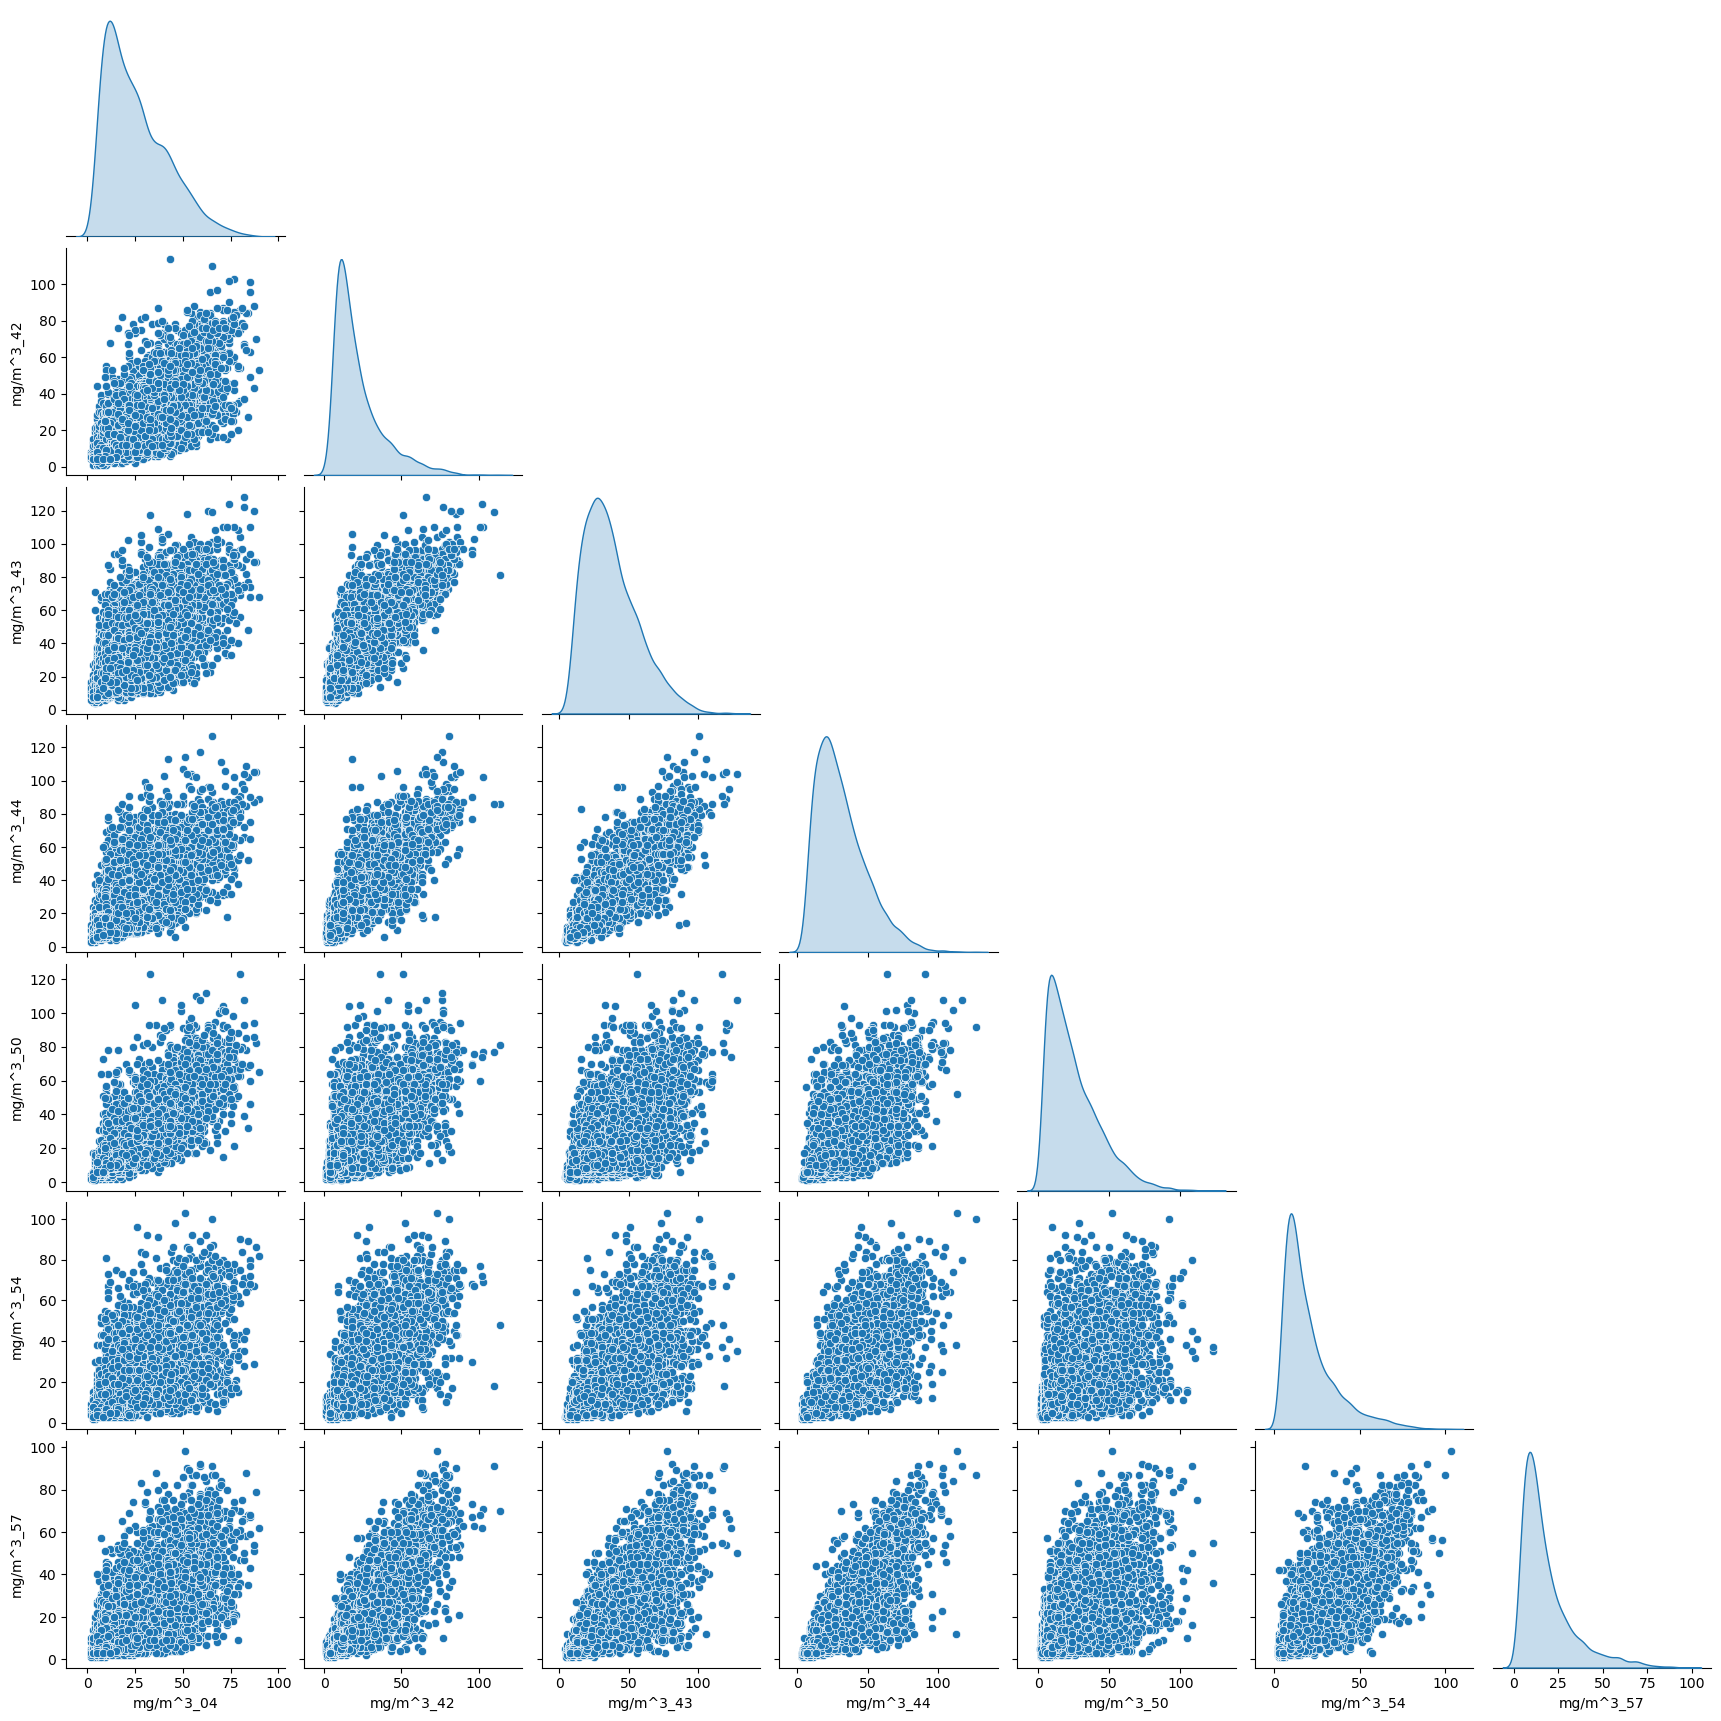

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(NO2,corner=True, diag_kind="kde")

plt.show()

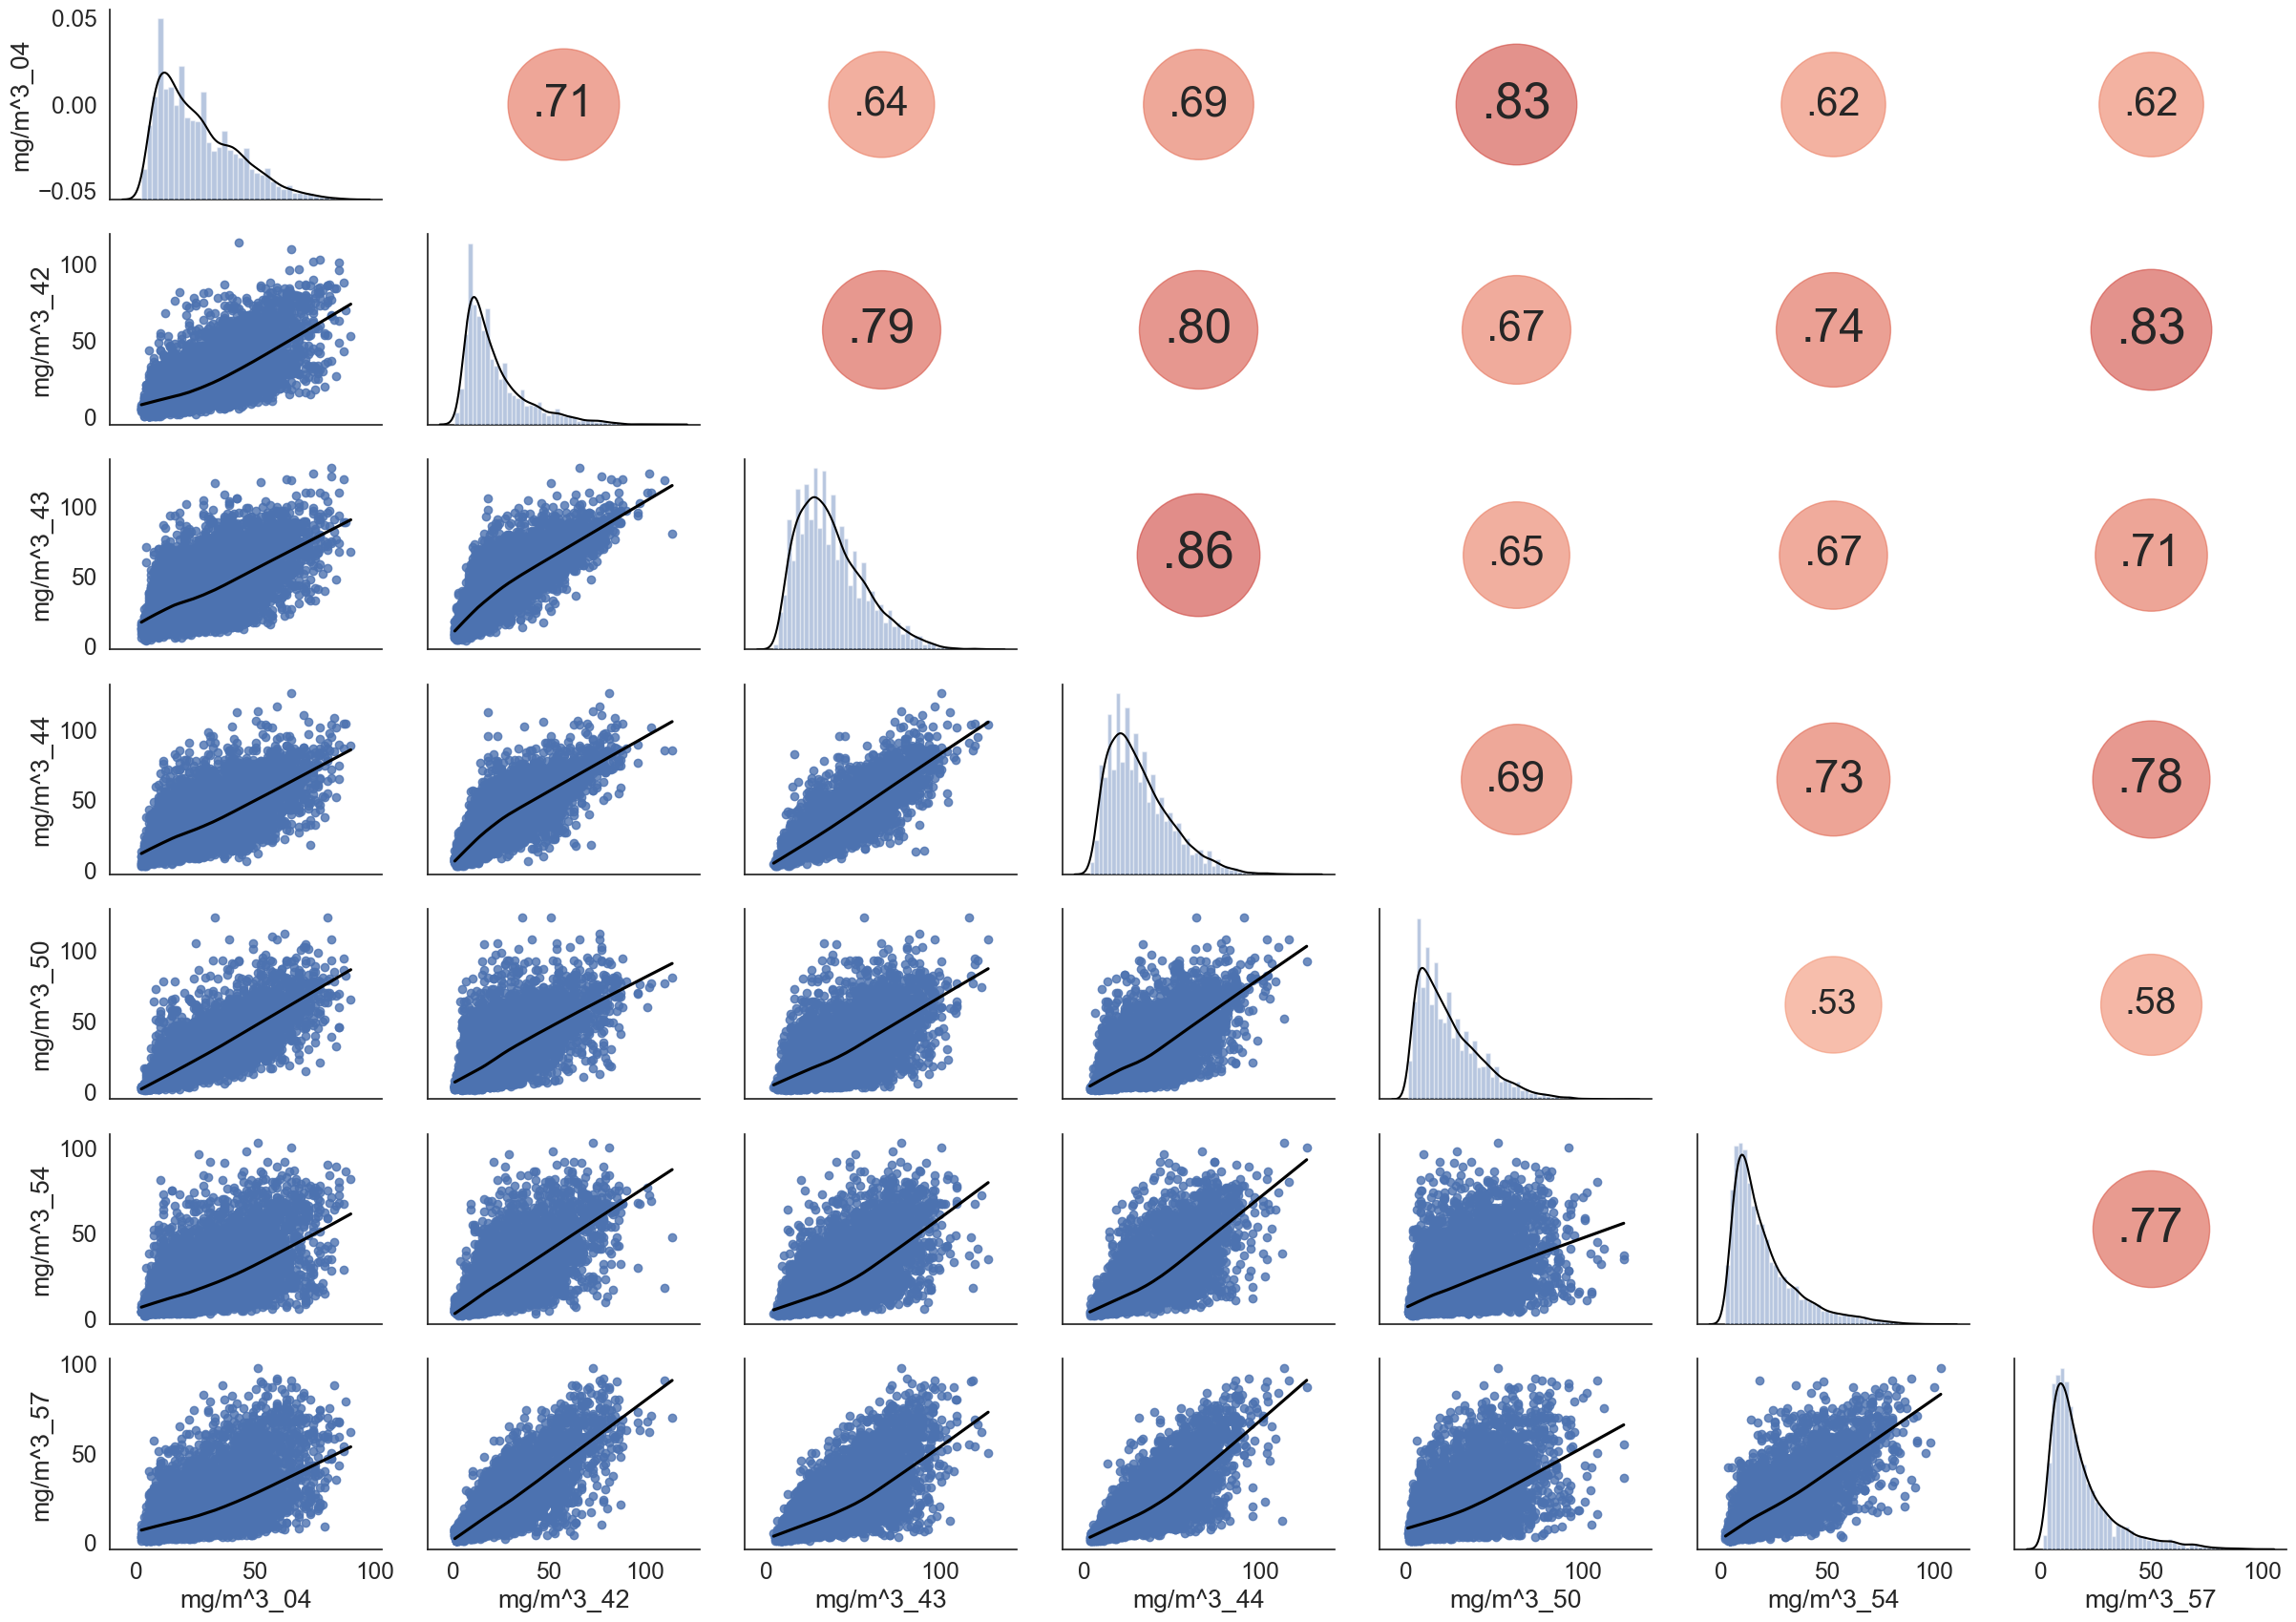

In [7]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(NO2, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

plt.show()